# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn import preprocessing

/Users/samanthashih/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Extract data from CSV

In [2]:
# Read worcester.csv into a DataFrame called worcester_df
worcester_df = pd.read_excel('./data/worcester.xlsx')
worcester_df

,Case ID number,Offense date,Case filing date,PRSCTR_OFC,Court name,Criminal count number,Charge code,Charge description,Charge type,Police department,...,Defendants gender,Judge name,Disposition date,Disposition code,Disposition description,Disposition type,Prosecutor disposition,Sentence type,Sentence description,Case status
0,10-01-001505-1,2009-12-19,2010-01-19,DUDC,Dudley District Court,1,265/13A/B,A&B c265 §13A(a),Misdemeanor ( 100 days or more ),Dudley Police Dept.,...,M,"Snider, Neil",2010-02-24,DISM5TH,Dism. 5th amend priv.,NaN,NaN,NaN,CROSS COMPLAINT,CLSD
1,11-12-002216-1,2011-11-12,2011-12-23,DUDC,Dudley District Court,1,90/23/E,"LICENSE SUSPENDED, OP MV WITH, SUBSQ.OFF c90 §23",NaN,Webster Police Dept.,...,M,"Bibaud, Timothy M",2012-01-27,RESP,Responsible,NaN,NaN,NaN,250,CLSD
2,12-06-001738-1,2012-06-18,2012-06-20,DUDC,Dudley District Court,1,265/15B/A,ASSAULT W/DANGEROUS WEAPON c265 §15B(b),Assault Dangerous Weapon,Webster Police Dept.,...,M,"Bibaud, Timothy M",2012-09-18,GPA,Guilty,NaN,NaN,NaN,9 months HOC cmttd,CLSD
3,12-06-001738-1,2012-06-18,2012-06-20,DUDC,Dudley District Court,2,265/15B/A,ASSAULT W/DANGEROUS WEAPON c265 §15B(b),Assault Dangerous Weapon,Webster Police Dept.,...,M,"Bibaud, Timothy M",2012-09-18,GPA,Guilty,NaN,NaN,NaN,9 months HOC cmttd,CLSD
4,12-07-001492-1,2012-07-15,2012-07-16,DUDC,Dudley District Court,1,265/15B/A,ASSAULT W/DANGEROUS WEAPON c265 §15B(b),Assault Dangerous Weapon,Webster Police Dept.,...,M,"Bibaud, Timothy M",2012-09-18,GPA,Guilty,NaN,NaN,NaN,9 months HOC cmttd,CLSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865175,22-01-001152-1,2021-12-12,2022-01-24,WIDC,Winchendon District Court,1,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 §23",MV Moving Violation,Winchendon Police Dept.,...,F,"Goldstein, Mark",2022-01-22,DISM,Dismissed,NaN,NaN,NaN,NaN,CLSD
865176,22-01-001168-1,2021-12-04,2022-01-24,GDC,Gardner District Court,1,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 §23",MV Moving Violation,Gardner Police Dept.,...,M,"Goldstein, Mark",2022-01-24,DISM,Dismissed,NaN,NaN,NaN,NaN,CLSD
865177,22-01-001171-1,2021-12-04,2022-01-24,GDC,Gardner District Court,1,266/30A/A,SHOPLIFTING BY ASPORTATION,Shoplifting,Gardner Police Dept.,...,F,"Goldstein, Mark",2022-01-24,RFN,Responsible Fines,NaN,NaN,NaN,50,CLSD
865178,22-01-001173-1,2022-01-22,2022-01-24,GDC,Gardner District Court,1,266/120,TRESPASS c266 §120,Tresspassing,Gardner Police Dept.,...,M,"Goldstein, Mark",2022-01-24,RFL,Responsible Filed,NaN,NaN,NaN,NaN,CLSD


# Data Analysis

In [3]:
worcester_df.columns

Index(['Case ID number', 'Offense date', 'Case filing date', 'PRSCTR_OFC',
       'Court name', 'Criminal count number', 'Charge code',
       'Charge description', 'Charge type', 'Police department',
       'Charge initiation', 'Defendent system ID', 'Defendants race/ethnicity',
       'Defendants gender', 'Judge name', 'Disposition date',
       'Disposition code', 'Disposition description', 'Disposition type',
       'Prosecutor disposition', 'Sentence type', 'Sentence description',
       'Case status'],
      dtype='object')

In [27]:
worcester = worcester_df[['Case ID number', 'Offense date', 'PRSCTR_OFC', 'Charge code', 'Defendants race/ethnicity', 'Disposition code', 'Sentence description']]
worcester.head()

,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
0,10-01-001505-1,2009-12-19,DUDC,265/13A/B,White,DISM5TH,CROSS COMPLAINT
1,11-12-002216-1,2011-11-12,DUDC,90/23/E,White,RESP,250
2,12-06-001738-1,2012-06-18,DUDC,265/15B/A,White,GPA,9 months HOC cmttd
3,12-06-001738-1,2012-06-18,DUDC,265/15B/A,White,GPA,9 months HOC cmttd
4,12-07-001492-1,2012-07-15,DUDC,265/15B/A,White,GPA,9 months HOC cmttd


In [28]:
worcester['PRSCTR_OFC'] = worcester['PRSCTR_OFC'].astype(str)
worcester['Charge code'] = worcester['Charge code'].astype(str)
worcester['Defendants race/ethnicity'] = worcester['Defendants race/ethnicity'].astype(str)
worcester['Disposition code'] = worcester['Disposition code'].astype(str)
worcester['Sentence description'] = worcester['Sentence description'].astype(str)

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_29229/3494344246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worcester['PRSCTR_OFC'] = worcester['PRSCTR_OFC'].astype(str)
/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_29229/3494344246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worcester['Charge code'] = worcester['Charge code'].astype(str)
/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_29229/3494344246.py:3: SettingWithCopyWarning: 
A value is trying to be

In [29]:
worcester_label_encoded = worcester.copy()
label_enc = preprocessing.LabelEncoder()
worcester_label_encoded['PRSCTR_OFC'] = label_enc.fit_transform(worcester['PRSCTR_OFC'])
worcester_label_encoded['Charge code'] = label_enc.fit_transform(worcester['Charge code'])
worcester_label_encoded['Defendants race/ethnicity'] = label_enc.fit_transform(worcester['Defendants race/ethnicity'])
worcester_label_encoded['Disposition code'] = label_enc.fit_transform(worcester['Disposition code'])
worcester_label_encoded['Sentence description'] = label_enc.fit_transform(worcester['Sentence description'])

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_95425/3359493468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = worcester_label_encoded.corr()


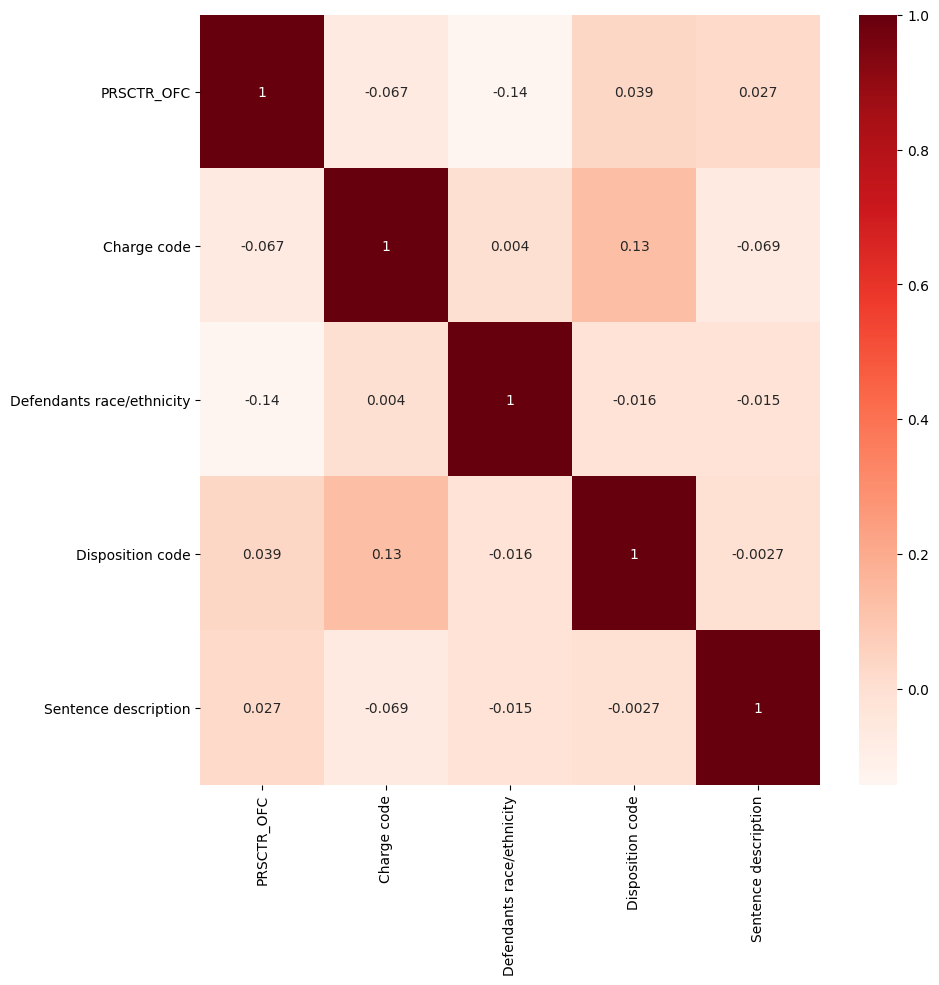

In [13]:
# make heatmap of correlation matrix
corr = worcester_label_encoded.corr()
figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
worcester['Charge code'].value_counts()

90/23/D       55516
265/13A/B     44520
90/10/A       39500
90/34J        30309
89/4A         24318
              ...  
101/31            1
VCO13/31          1
272/104/A         1
269/10h(2)        1
100/10            1
Name: Charge code, Length: 1790, dtype: int64

In [ ]:
# Most popular charge:
# Charge code = 90/23/D
# Charge description = LICENSE SUSPENDED, OP MV WITH c90 §23

In [15]:
license_suspended = worcester.loc[worcester['Charge code'] == "90/23/D"]
license_suspended_races = license_suspended['Defendants race/ethnicity'].unique()
license_suspended_disp_code = license_suspended['Disposition code'].unique()

In [16]:
# License suspended disposition codes top values

# DISM = dismissed

# CWOF = the defendant has a plea hearing and acknowledges to the judge that she committed the charged offense. 
# However, the judge does not find the defendant guilty.

# RFN

# GUILTY = guilty

In [17]:
license_suspended_top_disp_codes = ["DISM", "CWOF", "RFN", "GUILTY"]

In [18]:
# Remove nan
license_suspended_races = np.delete(license_suspended_races, 3)

In [19]:
license_suspended_races_disp_code = {}
for race in license_suspended_races:
  license_suspended_races_disp_code[race] = []
  race_rows = worcester_df.loc[worcester_df['Defendants race/ethnicity'] == race]
  num_ppl_race = len(race_rows)
  for disp_code in license_suspended_top_disp_codes:
    if (num_ppl_race != 0):
      license_suspended_races_disp_code[race].append(len(race_rows.loc[race_rows["Disposition code"]==disp_code])/num_ppl_race)

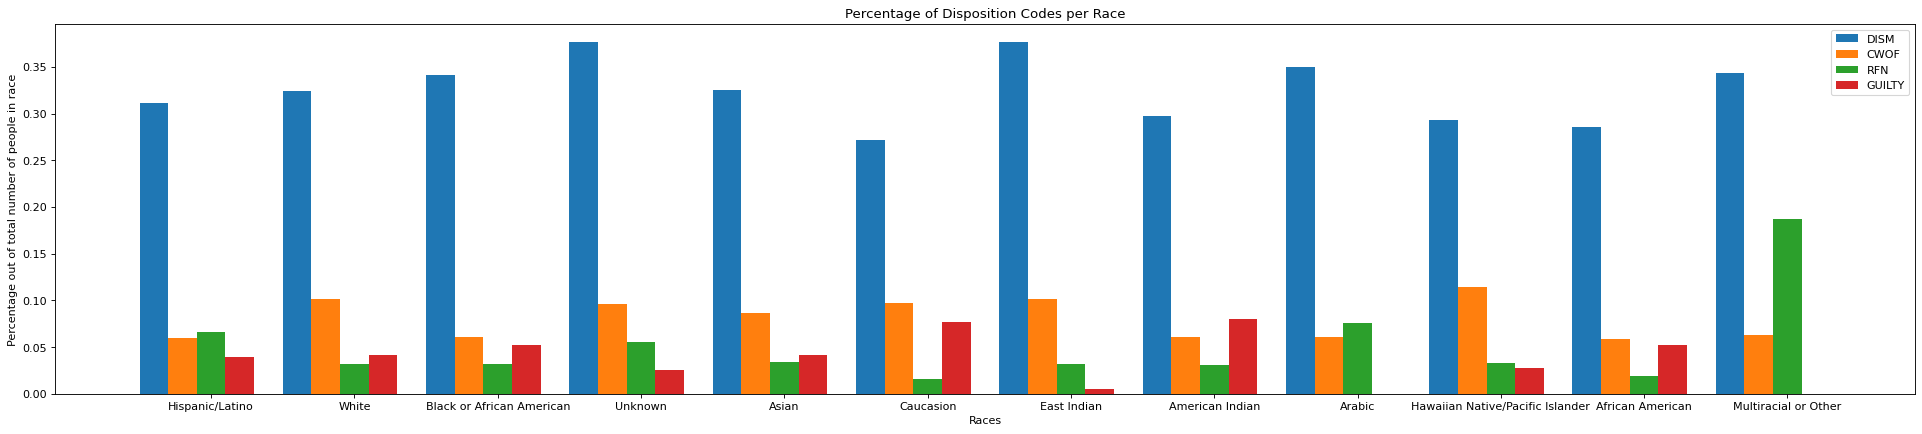

In [20]:
X = license_suspended_races
Ydism = []
Ycwof = []
Yrfn = []
Yguilty = []
for key in license_suspended_races_disp_code: 
  # print(license_suspended_races_disp_code[key])
  Ydism.append(license_suspended_races_disp_code[key][0])
  Ycwof.append(license_suspended_races_disp_code[key][1])
  Yrfn.append(license_suspended_races_disp_code[key][2])
  Yguilty.append(license_suspended_races_disp_code[key][3])

figure(figsize=(30, 6), dpi=80)  
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, Ydism, 0.2, label = 'DISM')
plt.bar(X_axis - 0.2, Ycwof, 0.2, label = 'CWOF')
plt.bar(X_axis, Yrfn, 0.2, label = 'RFN')
plt.bar(X_axis + 0.2, Yguilty, 0.2, label = 'GUILTY')

  
plt.xticks(X_axis, X)
plt.xlabel("Races")
plt.ylabel("Percentage out of total number of people in race")
plt.title("Percentage of Disposition Codes per Race")
plt.legend()
plt.show()

In [22]:
license_suspended_races_disp_code

{'Hispanic/Latino': [0.31132704436253283,
  0.05947445456844429,
  0.06621811131631582,
  0.038890974994827306],
 'White': [0.32428818543862076,
  0.10152747954508348,
  0.03200453015175595,
  0.041732369711636824],
 'Black or African American': [0.3416381888082016,
  0.061309269542930374,
  0.03202691157624946,
  0.052018368218709955],
 'Unknown': [0.3762803234501348,
  0.09565363881401617,
  0.05498652291105121,
  0.02587601078167116],
 'Asian': [0.3247156153050672,
  0.08686659772492245,
  0.03401126048489027,
  0.04136504653567735],
 'Caucasion': [0.2719152590896078,
  0.09665044374463212,
  0.01551674778127684,
  0.07655310621242485],
 'East Indian': [0.37682789651293586,
  0.10123734533183353,
  0.031496062992125984,
  0.00562429696287964],
 'American Indian': [0.2975206611570248,
  0.06060606060606061,
  0.030303030303030304,
  0.07988980716253444],
 'Arabic': [0.34980988593155893,
  0.060836501901140684,
  0.07604562737642585,
  0.0],
 'Hawaiian Native/Pacific Islander': [0.293

# Drug possess class b

In [67]:
# find rows where Charge code = 90/23/D
drug_possess_b = worcester.loc[worcester['Charge code'] == "94C/34/C"]
drug_possess_b

,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
21,10-03-000351-1,2010-02-27,WODC,94C/34/C,Hispanic/Latino,G,Guilty 90 days house of correction.
186,17-03-000774-1,2017-03-04,WOJS,94C/34/C,White,CWOF,1 DAY
200,2000000027,1999-11-24,WORC,94C/34/C,nan,GUILTY,CHGS JAILSENTENCE?: {1}\nCHGS PRISONSENTENCE?:...
225,08-07-001160-1,2008-07-05,WODC,94C/34/C,Black or African American,GUILTY,200
292,05-11-000977-1,2005-11-30,WODC,94C/34/C,nan,DISM,$300 court costs paid today; no analysis
...,...,...,...,...,...,...,...
863162,21-09-000351-1,2021-09-03,WODC,94C/34/C,White,GFL,nan
863589,21-09-001700-1,2021-08-17,LEDC,94C/34/C,White,PTP,C276.87 6 MOS
863850,21-10-000773-1,2021-07-15,DUDC,94C/34/C,White,RFN,$100 FINE
864048,21-10-001457-1,2021-06-24,FIDC,94C/34/C,Unknown,GFN,100


In [68]:
drug_possess_b['Defendants race/ethnicity'] = np.where(drug_possess_b['Defendants race/ethnicity'] == 'Caucasian', 'White', np.where(drug_possess_b['Defendants race/ethnicity'] == 'White', 'White', np.where(drug_possess_b['Defendants race/ethnicity'] == 'Black or African American', 'Black', np.where(drug_possess_b['Defendants race/ethnicity'] == 'African American', 'Black', np.where(drug_possess_b['Defendants race/ethnicity'] == 'Hispanic/Latino', 'Hispanic', 'Other')))))
drug_possess_b

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_29229/949355491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_possess_b['Defendants race/ethnicity'] = np.where(drug_possess_b['Defendants race/ethnicity'] == 'Caucasian', 'White', np.where(drug_possess_b['Defendants race/ethnicity'] == 'White', 'White', np.where(drug_possess_b['Defendants race/ethnicity'] == 'Black or African American', 'Black', np.where(drug_possess_b['Defendants race/ethnicity'] == 'African American', 'Black', np.where(drug_possess_b['Defendants race/ethnicity'] == 'Hispanic/Latino', 'Hispanic', 'Other')))))


,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
21,10-03-000351-1,2010-02-27,WODC,94C/34/C,Hispanic,G,Guilty 90 days house of correction.
186,17-03-000774-1,2017-03-04,WOJS,94C/34/C,White,CWOF,1 DAY
200,2000000027,1999-11-24,WORC,94C/34/C,Other,GUILTY,CHGS JAILSENTENCE?: {1}\nCHGS PRISONSENTENCE?:...
225,08-07-001160-1,2008-07-05,WODC,94C/34/C,Black,GUILTY,200
292,05-11-000977-1,2005-11-30,WODC,94C/34/C,Other,DISM,$300 court costs paid today; no analysis
...,...,...,...,...,...,...,...
863162,21-09-000351-1,2021-09-03,WODC,94C/34/C,White,GFL,nan
863589,21-09-001700-1,2021-08-17,LEDC,94C/34/C,White,PTP,C276.87 6 MOS
863850,21-10-000773-1,2021-07-15,DUDC,94C/34/C,White,RFN,$100 FINE
864048,21-10-001457-1,2021-06-24,FIDC,94C/34/C,Other,GFN,100


In [69]:
# replace rows where Sentence description = nan with "None"
drug_possess_b['Sentence description'] = drug_possess_b['Sentence description'].replace('nan', 'None')
drug_possess_b

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_29229/3598725253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_possess_b['Sentence description'] = drug_possess_b['Sentence description'].replace('nan', 'None')


,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
21,10-03-000351-1,2010-02-27,WODC,94C/34/C,Hispanic,G,Guilty 90 days house of correction.
186,17-03-000774-1,2017-03-04,WOJS,94C/34/C,White,CWOF,1 DAY
200,2000000027,1999-11-24,WORC,94C/34/C,Other,GUILTY,CHGS JAILSENTENCE?: {1}\nCHGS PRISONSENTENCE?:...
225,08-07-001160-1,2008-07-05,WODC,94C/34/C,Black,GUILTY,200
292,05-11-000977-1,2005-11-30,WODC,94C/34/C,Other,DISM,$300 court costs paid today; no analysis
...,...,...,...,...,...,...,...
863162,21-09-000351-1,2021-09-03,WODC,94C/34/C,White,GFL,None
863589,21-09-001700-1,2021-08-17,LEDC,94C/34/C,White,PTP,C276.87 6 MOS
863850,21-10-000773-1,2021-07-15,DUDC,94C/34/C,White,RFN,$100 FINE
864048,21-10-001457-1,2021-06-24,FIDC,94C/34/C,Other,GFN,100


In [70]:
# list rows where Sentence description includes jail
drug_possess_b_jail = drug_possess_b.loc[drug_possess_b['Sentence description'].str.contains("JAIL")]
# list rows where Sentence description includes fine
drug_possess_b_fine = drug_possess_b.loc[drug_possess_b['Sentence description'].str.contains("FINE")]
# list rows where Sentence description includes probation
drug_possess_b_none = drug_possess_b.loc[drug_possess_b['Sentence description'].str.contains("None")]


In [51]:
drug_possess_b_none

,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
314,02-11-009093-1,2002-11-08,WODC,94C/34/C,Black,DISM,None
858,11-06-002039-1,2011-06-20,WODC,94C/34/C,Hispanic,DIA,None
1112,08-10-000351-1,2008-10-03,WODC,94C/34/C,Black,DISM,None
1298,12-11-001677-1,2012-11-17,EBDC,94C/34/C,White,DISM,None
1301,18-05-000140-1,2018-05-01,WOJS,94C/34/C,White,DISM,None
...,...,...,...,...,...,...,...
862927,21-08-001646-1,2021-08-25,WEDC,94C/34/C,Hispanic,DISM,None
863018,21-08-001843-1,2021-08-12,MIDC,94C/34/C,White,DISM,None
863085,21-09-000111-1,2021-08-27,WIDC,94C/34/C,White,GFL,None
863162,21-09-000351-1,2021-09-03,WODC,94C/34/C,White,GFL,None


In [71]:
# replace Sentence description with "Jail" if it includes jail
drug_possess_b['Sentence description'] = np.where(drug_possess_b['Sentence description'].str.contains("JAIL"), "Jail", np.where(drug_possess_b['Sentence description'].str.contains("FINE"), "Fine", np.where(drug_possess_b['Sentence description'].str.contains("None"), "None", "Other")))
drug_possess_b

/var/folders/96/2td9rs4907lgb9p7msqfyqrm0000gn/T/ipykernel_29229/1792213012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_possess_b['Sentence description'] = np.where(drug_possess_b['Sentence description'].str.contains("JAIL"), "Jail", np.where(drug_possess_b['Sentence description'].str.contains("FINE"), "Fine", np.where(drug_possess_b['Sentence description'].str.contains("None"), "None", "Other")))


,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
21,10-03-000351-1,2010-02-27,WODC,94C/34/C,Hispanic,G,Other
186,17-03-000774-1,2017-03-04,WOJS,94C/34/C,White,CWOF,Other
200,2000000027,1999-11-24,WORC,94C/34/C,Other,GUILTY,Jail
225,08-07-001160-1,2008-07-05,WODC,94C/34/C,Black,GUILTY,Other
292,05-11-000977-1,2005-11-30,WODC,94C/34/C,Other,DISM,Other
...,...,...,...,...,...,...,...
863162,21-09-000351-1,2021-09-03,WODC,94C/34/C,White,GFL,None
863589,21-09-001700-1,2021-08-17,LEDC,94C/34/C,White,PTP,Other
863850,21-10-000773-1,2021-07-15,DUDC,94C/34/C,White,RFN,Fine
864048,21-10-001457-1,2021-06-24,FIDC,94C/34/C,Other,GFN,Other


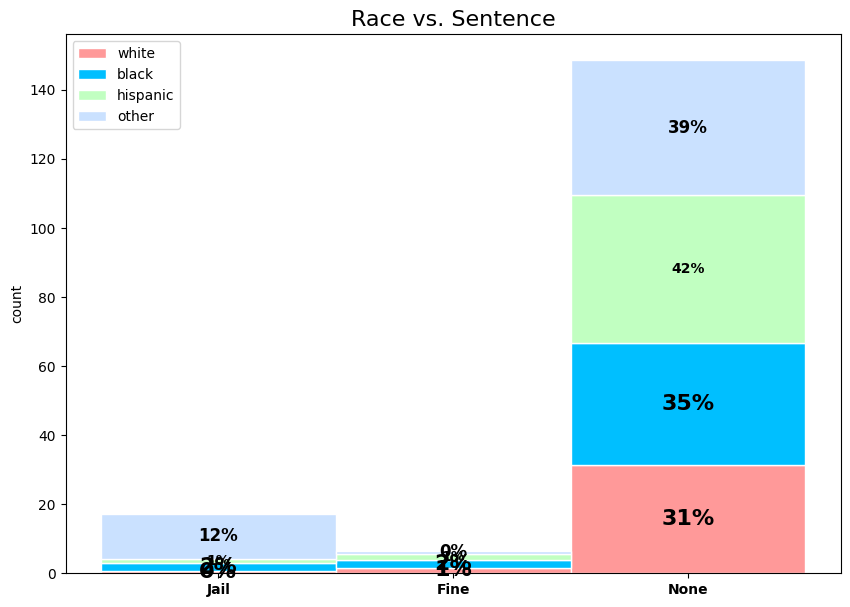

In [87]:
#Get values from the group and categories
races = ["White", "Black", "Hispanic", "Other"]
sentences = ["Jail", "Fine", "None"]

total_white = len(drug_possess_b[drug_possess_b["Defendants race/ethnicity"] == races[0]])
total_black = len(drug_possess_b[drug_possess_b["Defendants race/ethnicity"] == races[1]])
total_hispanic = len(drug_possess_b[drug_possess_b["Defendants race/ethnicity"] == races[1]])
total_other = len(drug_possess_b[drug_possess_b["Defendants race/ethnicity"] == races[2]])

# total number of Code Rc = caucasian
white = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[0]) & (drug_possess_b["Sentence description"] == sentences[0])]) / total_white * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[0]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_white * 100,
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[0]) & (drug_possess_b["Sentence description"] == sentences[2])]) / total_white * 100
]
black = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[1]) & (drug_possess_b["Sentence description"] == sentences[0])])/ total_black * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[1]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_black * 100,
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[1]) & (drug_possess_b["Sentence description"] == sentences[2])]) / total_black * 100
]

hispanic = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[2]) & (drug_possess_b["Sentence description"] == sentences[0])]) / total_hispanic * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[2]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_hispanic* 100,
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[2]) & (drug_possess_b["Sentence description"] == sentences[2])]) / total_hispanic* 100
]

other = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[3]) & (drug_possess_b["Sentence description"] == sentences[0])]) / total_other * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[3]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_other * 100,
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[3]) & (drug_possess_b["Sentence description"] == sentences[2])]) / total_other * 100
]


#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(sentences))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.bar(r, white, color=colors[0], edgecolor='white', width=barWidth, label="white")
ax2 = plt.bar(r, black, bottom=np.array(white), color=colors[1], edgecolor='white', width=barWidth, label='black')
ax3 = plt.bar(r, hispanic, bottom=np.array(white)+np.array(black), color=colors[2], edgecolor='white', width=barWidth, label='hispanic')
ax4 = plt.bar(r, other, bottom=np.array(white)+np.array(black)+np.array(hispanic), color=colors[3], edgecolor='white', width=barWidth, label='other')

plt.legend()
# Custom X axis
plt.xticks(r, sentences, fontweight='bold')
plt.ylabel("count")
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1 + "%", ha="center", va="center", color="black", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2  + "%", ha="center", va="center", color="black", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3  + "%", ha="center", va="center", color="black", fontsize=10, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4  + "%", ha="center", va="center", color="black", fontsize=12, fontweight="bold")

# set title
plt.title("Race vs. Sentence", loc='center', fontsize=16, fontweight=0, color='black')

plt.show()


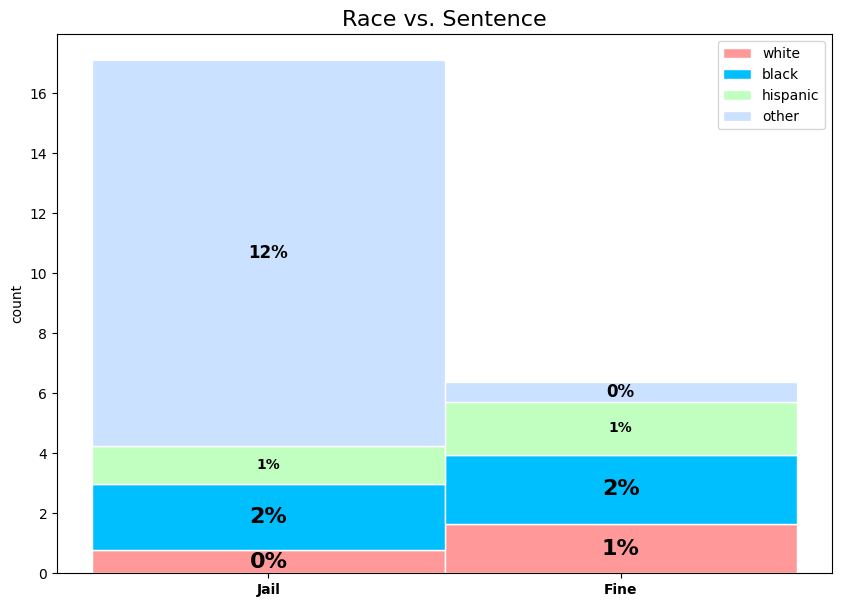

In [23]:
#Get values from the group and categories
races = ["White", "Black", "Hispanic", "Other"]
sentences = ["Jail", "Fine"]

# total number of Code Rc = caucasian
white = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[0]) & (drug_possess_b["Sentence description"] == sentences[0])]) / total_white * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[0]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_white * 100,
]
black = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[1]) & (drug_possess_b["Sentence description"] == sentences[0])])/ total_black * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[1]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_black * 100,
]

hispanic = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[2]) & (drug_possess_b["Sentence description"] == sentences[0])]) / total_hispanic * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[2]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_hispanic* 100,
]

other = [
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[3]) & (drug_possess_b["Sentence description"] == sentences[0])]) / total_other * 100, 
    len(drug_possess_b[(drug_possess_b["Defendants race/ethnicity"] == races[3]) & (drug_possess_b["Sentence description"] == sentences[1])]) / total_other * 100,
]


#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(sentences))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.bar(r, white, color=colors[0], edgecolor='white', width=barWidth, label="white")
ax2 = plt.bar(r, black, bottom=np.array(white), color=colors[1], edgecolor='white', width=barWidth, label='black')
ax3 = plt.bar(r, hispanic, bottom=np.array(white)+np.array(black), color=colors[2], edgecolor='white', width=barWidth, label='hispanic')
ax4 = plt.bar(r, other, bottom=np.array(white)+np.array(black)+np.array(hispanic), color=colors[3], edgecolor='white', width=barWidth, label='other')

plt.legend()
# Custom X axis
plt.xticks(r, sentences, fontweight='bold')
plt.ylabel("count")
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1  + "%", ha="center", va="center", color="black", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2  + "%", ha="center", va="center", color="black", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3  + "%", ha="center", va="center", color="black", fontsize=10, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4  + "%", ha="center", va="center", color="black", fontsize=12, fontweight="bold")

# set title
plt.title("Race vs. Sentence", loc='center', fontsize=16, fontweight=0, color='black')

plt.show()


In [88]:
# sum up white and append 100-sum(white)
white.append(100 - sum(white))
# sum up black and append 100-sum(black)
black.append(100 - sum(black))
# sum up hispanic and append 100-sum(hispanic)
hispanic.append(100 - sum(hispanic))
# sum up other and append 100-sum(other)
other.append(100 - sum(other))

In [90]:
white

[0.7790943028729103, 1.6555753936049342, 31.212465508845966, 66.35286479467618]

In [91]:
black

[2.205258693808312, 2.2900763358778624, 35.36895674300254, 60.135708227311284]

In [92]:
hispanic

[1.2722646310432568, 1.7811704834605597, 42.917726887192536, 54.02883799830364]

In [89]:
other

[12.859884836852206, 0.6397952655150352, 39.15547024952015, 47.34484964811261]

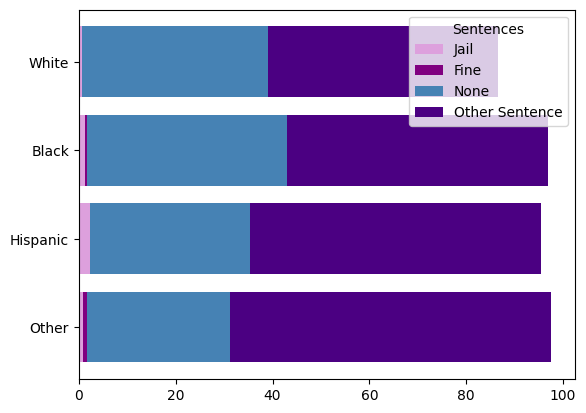

In [106]:
# make horizontal stacked bar chart
races = ["Other", "Hispanic", "Black", "White"]

jail = [white[0], black[0], hispanic[0], other[0]]
fine = [white[1], black[1], hispanic[1], other[1]]
none = [white[2], black[2], hispanic[2], other[2]]
other_sentence = [white[3], black[3], hispanic[3], other[3]]

b1 = plt.barh(races, jail, color="plum")

b2 = plt.barh(races, fine, left=jail, color="purple")

b3 = plt.barh(races, none, left=fine, color="steelblue")

b4 = plt.barh(races, other_sentence, left=none, color="indigo")

plt.legend([b1, b2, b3, b4], ["Jail", "Fine", "None", "Other Sentence"], title="Sentences", loc="upper right")

plt.show()

# Assault and Battery % GLTY per race

In [107]:
# what is the most commmon Charge code in worcester 
worcester["Charge code"].value_counts().head(10)

90/23/D      55516
265/13A/B    44520
90/10/A      39500
90/34J       30309
89/4A        24318
90/24/J      22920
90/17/A      21638
90/23/H      21451
90/9/B       20771
90/24/E      19375
Name: Charge code, dtype: int64

In [108]:
# find rows where Charge code = 90/23/D
assault = worcester.loc[worcester['Charge code'] == "265/13A/B"]
assault

,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
0,10-01-001505-1,2009-12-19,DUDC,265/13A/B,White,DISM5TH,CROSS COMPLAINT
26,12-11-001990-1,2012-11-22,WODC,265/13A/B,Hispanic/Latino,DISM,nan
45,08-08-000524-1,2008-07-30,CLDC,265/13A/B,Hispanic/Latino,GUILTY,nan
46,10-12-002294-1,2010-12-02,CLDC,265/13A/B,Hispanic/Latino,PG,6 MONTHS. -CONCURRENT WITH LIFE
93,07-07-000008-1,2007-06-28,WODC,265/13A/B,Hispanic/Latino,DISM,nan
...,...,...,...,...,...,...,...
863683,21-10-000347-1,2021-10-06,LEDC,265/13A/B,White,DISM,nan
863807,21-10-000632-1,2021-10-10,EBDC,265/13A/B,Unknown,DISM,nan
863872,21-10-000875-1,2021-10-12,EBDC,265/13A/B,Unknown,DISM,nan
864234,21-11-000319-1,2021-11-03,WEDC,265/13A/B,White,DISM,DEFENDNAT HAS A PLAN + BEEN IN TREATMWENT. DE...


In [38]:
# get number of each code rc
race_counts = assault['Defendants race/ethnicity'].value_counts()
race_counts

White                               24047
nan                                  6137
Hispanic/Latino                      5835
Black or African American            5451
Unknown                              1410
Caucasion                            1155
Asian                                 370
East Indian                            70
American Indian                        17
Arabic                                 12
Hawaiian Native/Pacific Islander       11
African American                        5
Name: Defendants race/ethnicity, dtype: int64

In [109]:
# drop rows where race == "unknown"
assault = assault[assault['Defendants race/ethnicity'] != "Unknown"]
assault = assault[assault['Defendants race/ethnicity'] != "nan"]
assault

,Case ID number,Offense date,PRSCTR_OFC,Charge code,Defendants race/ethnicity,Disposition code,Sentence description
0,10-01-001505-1,2009-12-19,DUDC,265/13A/B,White,DISM5TH,CROSS COMPLAINT
26,12-11-001990-1,2012-11-22,WODC,265/13A/B,Hispanic/Latino,DISM,nan
45,08-08-000524-1,2008-07-30,CLDC,265/13A/B,Hispanic/Latino,GUILTY,nan
46,10-12-002294-1,2010-12-02,CLDC,265/13A/B,Hispanic/Latino,PG,6 MONTHS. -CONCURRENT WITH LIFE
93,07-07-000008-1,2007-06-28,WODC,265/13A/B,Hispanic/Latino,DISM,nan
...,...,...,...,...,...,...,...
863620,21-10-000116-1,2021-09-26,EBDC,265/13A/B,White,PTP,90 DAYS. SA/NC.
863621,21-10-000118-1,2021-09-27,EBDC,265/13A/B,White,DISM,"VICTIM DIDNT WANT TO GO FORWARD, DEFENDANT IN ..."
863683,21-10-000347-1,2021-10-06,LEDC,265/13A/B,White,DISM,nan
864234,21-11-000319-1,2021-11-03,WEDC,265/13A/B,White,DISM,DEFENDNAT HAS A PLAN + BEEN IN TREATMWENT. DE...


In [110]:
assault["Defendants race/ethnicity"].replace({"Caucasian": "White"}, inplace=True)
assault["Defendants race/ethnicity"].replace({"Black or African American": "Black"}, inplace=True)
assault["Defendants race/ethnicity"].replace({"African American": "Black"}, inplace=True)
assault["Defendants race/ethnicity"].replace({"Hispanic/Latino": "Hispanic"}, inplace=True)
assault["Defendants race/ethnicity"].replace({"Hispanic/Latino": "Hispanic"}, inplace=True)

In [111]:
race_counts = assault["Defendants race/ethnicity"].value_counts()
race_counts

White                               24047
Hispanic                             5835
Black                                5456
Caucasion                            1155
Asian                                 370
East Indian                            70
American Indian                        17
Arabic                                 12
Hawaiian Native/Pacific Islander       11
Name: Defendants race/ethnicity, dtype: int64

In [112]:
# for each code rc, count number of GLTY for Code dspstn
white_glty = len(assault[(assault['Defendants race/ethnicity'] == 'White') & (assault['Disposition code'] == 'GUILTY')])
black_glty = len(assault[(assault['Defendants race/ethnicity'] == 'Black') & (assault['Disposition code'] == 'GUILTY')])
hispanic_glty = len(assault[(assault['Defendants race/ethnicity'] == 'Hispanic') & (assault['Disposition code'] == 'GUILTY')])
asian_glty = len(assault[(assault['Defendants race/ethnicity'] == 'Asian') & (assault['Disposition code'] == 'GUILTY')])
east_indian_glty = len(assault[(assault['Defendants race/ethnicity'] == 'East Indian') & (assault['Disposition code'] == 'GUILTY')])
american_indian_glty = len(assault[(assault['Defendants race/ethnicity'] == 'American Indian') & (assault['Disposition code'] == 'GUILTY')])
arabic_glty = len(assault[(assault['Defendants race/ethnicity'] == 'Arabic') & (assault['Disposition code'] == 'GUILTY')])
hawaiian_pi_glty = len(assault[(assault['Defendants race/ethnicity'] == 'Hawaiian Native/Pacific Islander') & (assault['Disposition code'] == 'GUILTY')])

print("white: ", white_glty)
print("black: ", black_glty)
print("hispanic: ", hispanic_glty)
print("asian: ", asian_glty)
print("east indian: ", east_indian_glty)
print("american_indian_glty: ", american_indian_glty)
print("arabic_glty: ", arabic_glty)
print("hawaiian_pi_glty: ", hawaiian_pi_glty)

white:  1291
black:  332
hispanic:  381
asian:  20
east indian:  0
american_indian_glty:  0
arabic_glty:  0
hawaiian_pi_glty:  1


In [113]:
white_glty_percentage = (white_glty / race_counts['White']) * 100
black_glty_percentage = (black_glty / race_counts['Black']) * 100
hispanic_glty_percentage = (hispanic_glty / race_counts['Hispanic']) * 100
asian_glty_percentage = (asian_glty / race_counts['Asian']) * 100
east_indian_glty_percentage = (east_indian_glty / race_counts['East Indian']) * 100
american_indian_glty_percentage = (american_indian_glty / race_counts['American Indian']) * 100
hawaiian_pi_glty_percentage = (hawaiian_pi_glty / race_counts['Hawaiian Native/Pacific Islander']) * 100
arabic_glty_percentage = (arabic_glty / race_counts['Arabic']) * 100

In [114]:
# format perentage 
print("white: ", "{:.2f}".format(white_glty_percentage), "%")
print("black: ", "{:.2f}".format(black_glty_percentage), "%")
print("hispanic: ", "{:.2f}".format(hispanic_glty_percentage), "%")
print("east_indian: ", "{:.2f}".format(east_indian_glty_percentage), "%")
print("asian: ", "{:.2f}".format(asian_glty_percentage), "%")
print("american_indian: ", "{:.2f}".format(american_indian_glty_percentage), "%")
print("hawaiian_pi_glty_percentage: ", "{:.2f}".format(hawaiian_pi_glty_percentage), "%")
print("arabic_glty_percentage: ", "{:.2f}".format(arabic_glty_percentage), "%")

# print("other: ", "{:.2f}".format(other_glty_percentage), "%")

white:  5.37 %
black:  6.09 %
hispanic:  6.53 %
east_indian:  0.00 %
asian:  5.41 %
american_indian:  0.00 %
hawaiian_pi_glty_percentage:  9.09 %
arabic_glty_percentage:  0.00 %


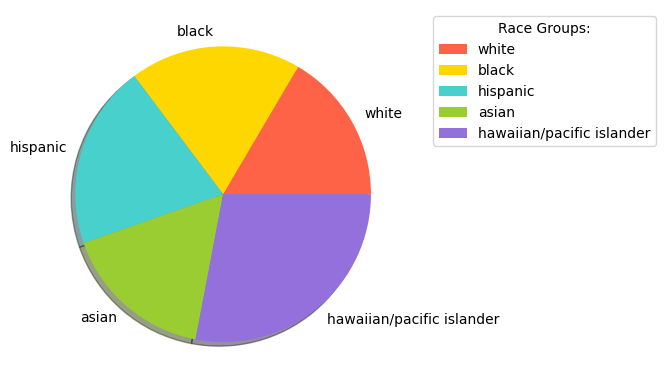

In [122]:
# array of the percentages
y = np.array([white_glty_percentage, black_glty_percentage, hispanic_glty_percentage, asian_glty_percentage, 
            hawaiian_pi_glty_percentage])
mylabels = ["white", "black", "hispanic", "asian", "hawaiian/pacific islander"]
mycolors = ["tomato", "gold", "mediumturquoise", "yellowgreen", "mediumpurple"]
plt.pie(y, labels=mylabels, colors=mycolors,  shadow = True)
plt.legend(bbox_to_anchor=(1.05, 1), title = "Race Groups:")
plt.show()